<a href="https://colab.research.google.com/github/cherukurigreeshma/sentiment-analysis/blob/main/sentimentanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re

from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [25]:
#Load IMDb Reviews dataset
df = pd.read_csv(r"/content/Twitter_Data.csv")
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


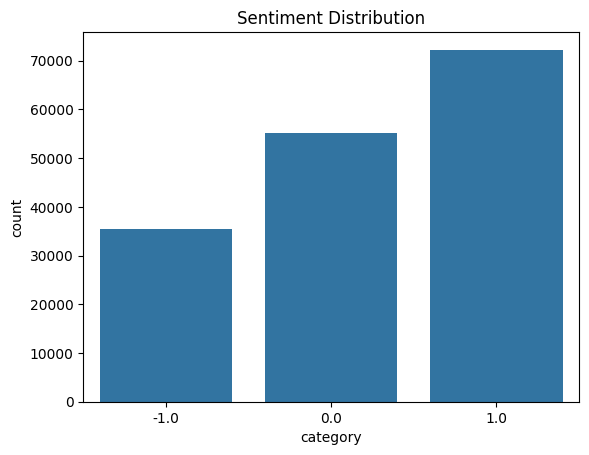

In [26]:
# Check null values
df.isnull().sum()

# Class distribution
sns.countplot(data=df, x='category')
plt.title("Sentiment Distribution")
plt.show()

In [27]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    # Check if text is a string, if not return it as is
    if not isinstance(text, str):
        return text
    text = text.lower()
    text = re.sub(r'<[^>]+>', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words]
    return " ".join(tokens)

df['clean_text'] = df['clean_text'].apply(clean_text)

In [28]:
# Fill NaN values in 'clean_text' with empty strings
df['clean_text'] = df['clean_text'].fillna('')

# Drop rows with NaN in the 'category' column
df.dropna(subset=['category'], inplace=True)

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_text'])
y = df['category']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

In [31]:
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

        -1.0       0.87      0.43      0.57      7230
         0.0       0.82      0.65      0.73     10961
         1.0       0.65      0.92      0.76     14404

    accuracy                           0.72     32595
   macro avg       0.78      0.67      0.69     32595
weighted avg       0.76      0.72      0.71     32595

Confusion Matrix:
[[ 3085   716  3429]
 [  132  7165  3664]
 [  309   871 13224]]
Accuracy Score:
0.7201718054916398


In [32]:
def predict_sentiment(text):
    cleaned = clean_text(text)
    vectorized = vectorizer.transform([cleaned])
    return model.predict(vectorized)[0]

predict_sentiment("This movie was absolutely amazing!")


np.float64(1.0)